### Algunos gráficos para entender mejor los datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Abrir el archivo xlsx
df = pd.read_excel('../data/data.xlsx')

# Contar los nan en cada columna
print(df.isna().sum())
cols = df.columns
print("Columnas", cols.values, "\n", "Cantidad de filas", len(df))
df.head(5)

Enlace                          0
Marca                           0
Nombre                          0
Badge Promocional            7531
Descripción del Producto        0
Precio Anterior                 0
Precio Actual                   0
Categoria 1                     0
Categoria 2                  1009
Categoria 3                 10127
dtype: int64
Columnas ['Enlace' 'Marca' 'Nombre' 'Badge Promocional' 'Descripción del Producto'
 'Precio Anterior' 'Precio Actual' 'Categoria 1' 'Categoria 2'
 'Categoria 3'] 
 Cantidad de filas 28613


,Enlace,Marca,Nombre,Badge Promocional,Descripción del Producto,Precio Anterior,Precio Actual,Categoria 1,Categoria 2,Categoria 3
0,https://www.elpalaciodehierro.com/violanti-sal...,Violanti,Sala Design Gris Oxford,Meses Sin Intereses,Sala Violanti Design elaborada en madera tapiz...,42999.0,25799.4,hogar,muebles,salas
1,https://www.elpalaciodehierro.com/boal-sofa-en...,Boal,Sofá en Piel Velvet Acero,Meses Sin Intereses,"Sofá Boal elaborado en piel color acero, detal...",41790.0,29253.0,hogar,muebles,salas
2,https://www.elpalaciodehierro.com/bd-sala-modu...,B&D,Sala Modular Lotus lorca,Departamento Palacio,Sala modular B&D de la línea Lotus elaborada e...,38490.0,23094.0,hogar,muebles,salas
3,https://www.elpalaciodehierro.com/liz-sofa-yuk...,Liz,Sofá Yukio Gris,Meses Sin Intereses,Sofá Liz Yukio elaborado en material textil co...,50190.0,35133.0,hogar,muebles,salas
4,https://www.elpalaciodehierro.com/boal-love-se...,Boal,Love Seat en Piel Velvet Acero,Meses Sin Intereses,Love Seat Boal Velvet elaborado en piel y vini...,31490.0,22043.0,hogar,muebles,salas


C:\Users\sebag\AppData\Local\Temp\ipykernel_10216\3792897860.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hogar['Categoria 2'] = df_hogar['Categoria 2'].replace('bano', 'baño')
e:\Drive-Seba\UChile\10mo semestre\Proyecto de Ciencia de Datos\E-Commerce-Chatbot\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Drive-Seba\UChile\10mo semestre\Proyecto de Ciencia de Datos\E-Commerce-Chatbot\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cate

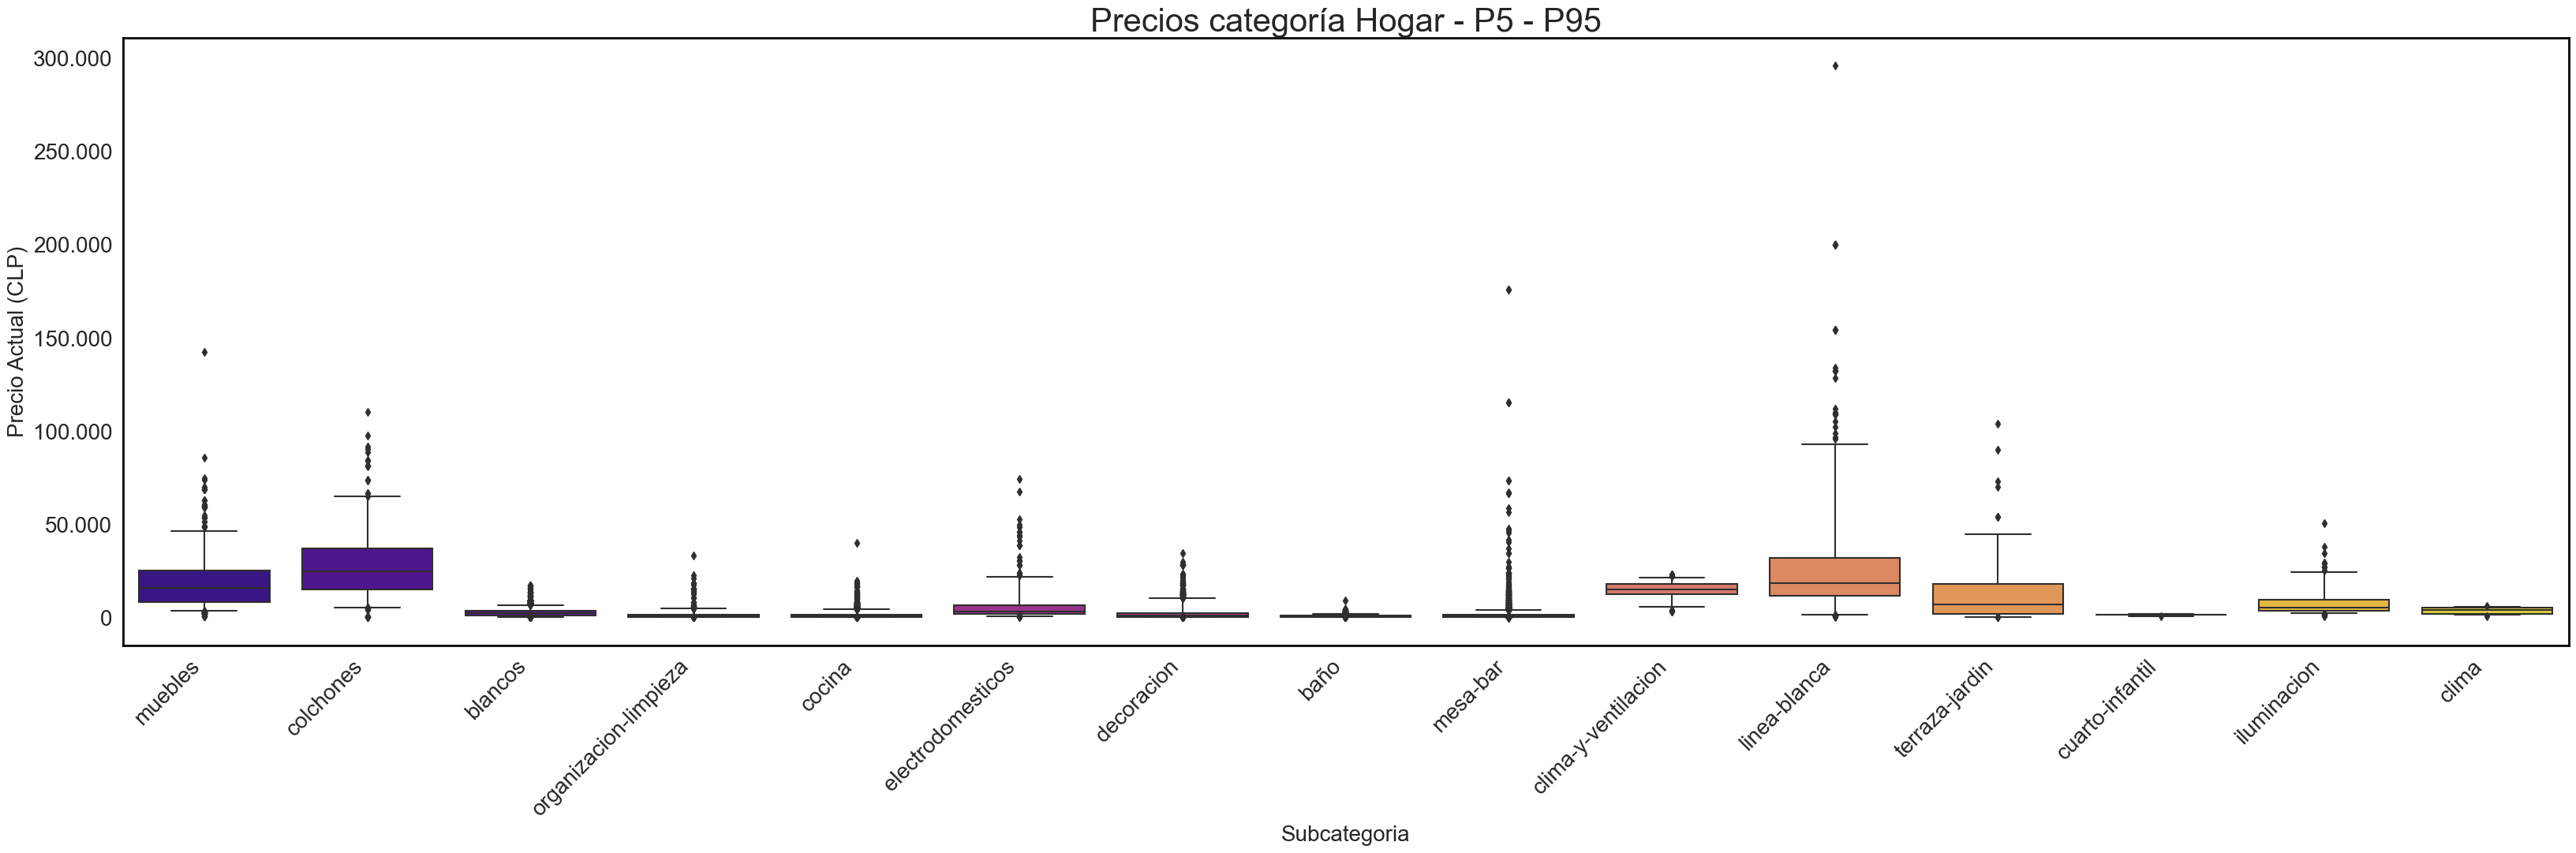

In [44]:
import seaborn as sns
import matplotlib.ticker as mticker

format_y_axis = lambda x, pos: '{:,.0f}'.format(x).replace(',', '.')
# Grafico de boxplot por cada subcategoria de hogar
df_hogar = df[df['Categoria 1'] == 'hogar']

# Grafico de boxplot por cada subcategoria de hogar
mex_to_clp = 51.58
title = 'Precios categoría Hogar - P5 - P95'
# Transformar a CLP
df_hogar['Categoria 2'] = df_hogar['Categoria 2'].replace('bano', 'baño')
fig, ax = plt.subplots(figsize=(40, 10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
sns.set(rc={'figure.figsize':(40,10)})
ax = sns.boxplot(x='Categoria 2', y='Precio Actual', data=df_hogar, palette="plasma",  whis=[5, 95])
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_y_axis))
plt.title(title, fontsize=30)
plt.xlabel('Subcategoria', fontsize=20)
plt.ylabel('Precio Actual (CLP)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)
plt.show()

e:\Drive-Seba\UChile\10mo semestre\Proyecto de Ciencia de Datos\E-Commerce-Chatbot\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Drive-Seba\UChile\10mo semestre\Proyecto de Ciencia de Datos\E-Commerce-Chatbot\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Drive-Seba\UChile\10mo semestre\Proyecto de Ciencia de Datos\E-Commerce-Chatbot\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


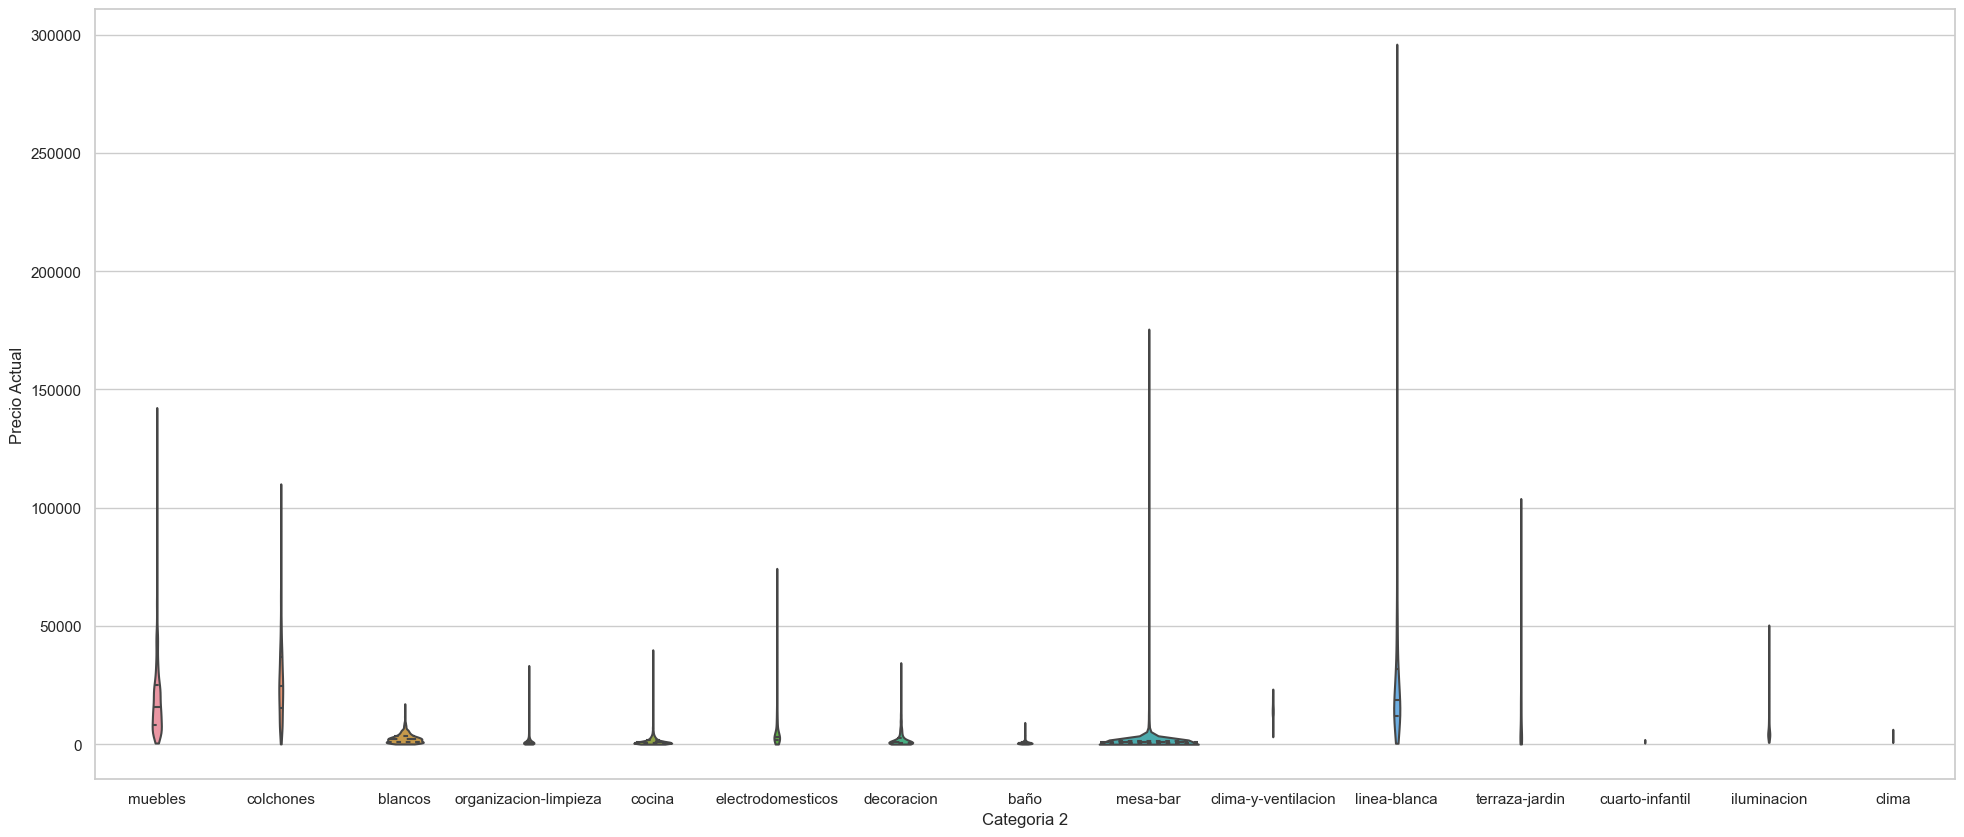

In [5]:

# Hacer mismo grafico pero con el de distribuciones de seaborn (violin plot)
import seaborn as sns
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(24, 10))
# Escala logaritmica 2-98 percentil
ax = sns.violinplot(x="Categoria 2", y="Precio Actual", data=df_hogar, scale='count', cut=0, inner='quartile', bw=.2)
plt.title("Distribución de precios por subcategoría", fontsize=30)
plt.show()

e:\Drive-Seba\UChile\10mo semestre\Proyecto de Ciencia de Datos\E-Commerce-Chatbot\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Drive-Seba\UChile\10mo semestre\Proyecto de Ciencia de Datos\E-Commerce-Chatbot\.env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


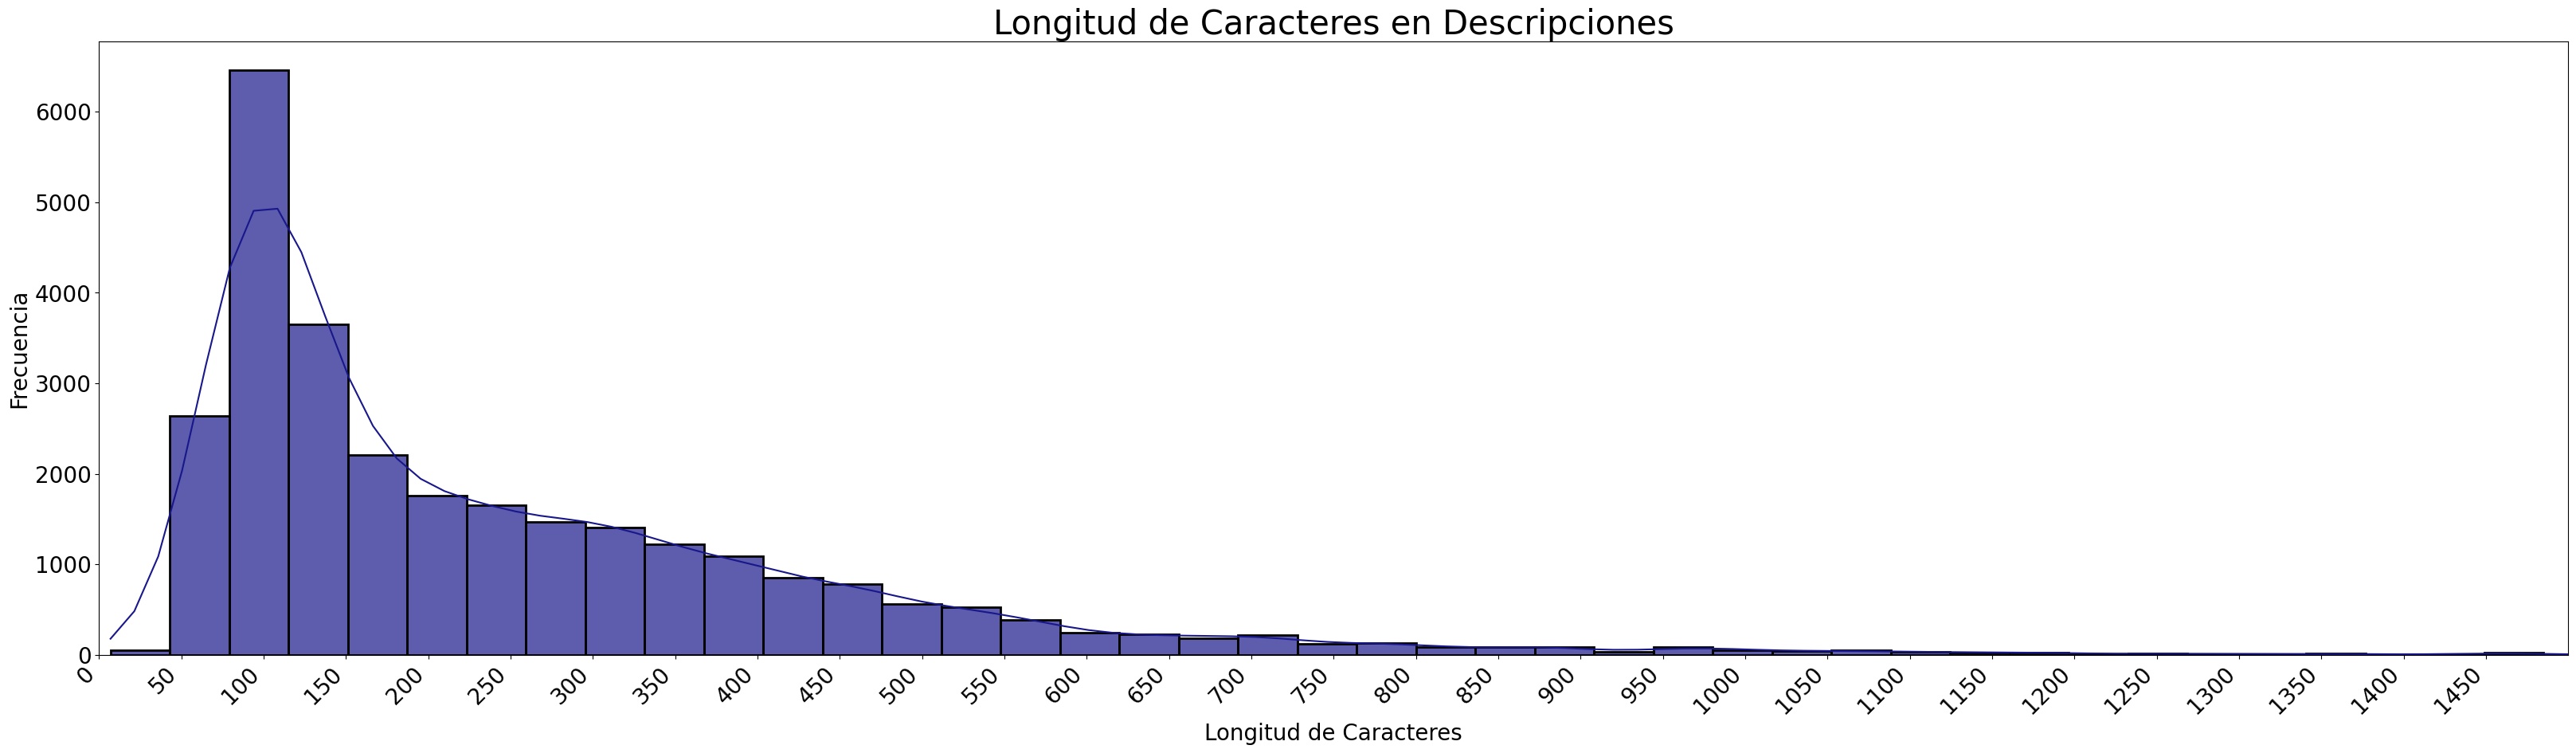

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Lista de longitudes de caracteres de las descripciones
longitudes_descripciones = [len(desc) for desc in df['Descripción del Producto']]
# Crear el histograma
fig, ax = plt.subplots(figsize=(40, 10))
sns.histplot(longitudes_descripciones, bins=80, edgecolor='k', alpha=0.7, color='#18178b', kde=True, linewidth=2)
ax.set_facecolor('white')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2

plt.xlabel('Longitud de Caracteres', fontsize=20)
plt.ylabel('Frecuencia', fontsize=20)

plt.xticks(range(0, 1500, 50), rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.title('Longitud de Caracteres en Descripciones',fontsize=30)
plt.xlim(0, 1500)
plt.grid(False)
plt.show()